# Logistic Regression: Tumor Data and Student Data
Import all necessary libraries. (Note: Logistic Regression in sklearn is L2-regularized by default)

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 

import pandas as pd
# import piplite
# await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score
from statistics import stdev, mean
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
features = breast_cancer_wisconsin_diagnostic.data.features 
targets = breast_cancer_wisconsin_diagnostic.data.targets 

print(targets)
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


    Diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE

## Tumor Data Set

(398, 30)
(171, 30)


C:\Users\SmartI-Lab1\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 0.9974874371859297


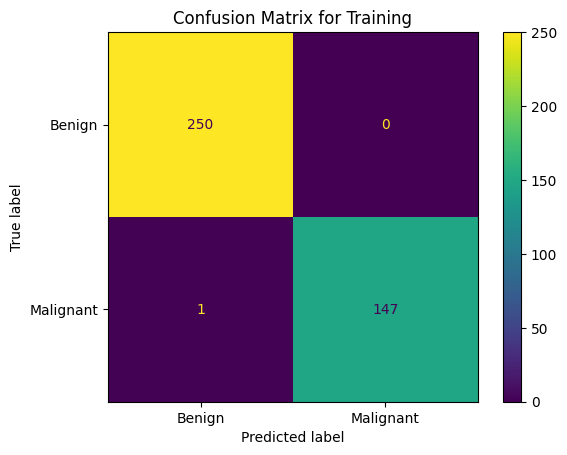

Training F1 Score: 0.9966101694915255
Training Precision Score: 1.0
Training Recall Score: 0.9932432432432432
Testing accuracy = 0.9473684210526315
Coefficients:  [-108.45170613] [[-1.79731675e+01  1.23061627e+00  5.88757906e-01  1.31085593e-01
   1.80619587e+02 -6.65534515e+01 -7.66685311e+00  1.14941443e+02
  -6.75662027e+01  3.37201577e+02  8.35882714e+01  4.50794341e+00
  -6.25776683e+00  9.92832338e-02  3.13971433e+01 -2.39556701e+02
  -7.66207314e+01  2.22409125e+02 -4.28665301e+02 -6.04931941e+01
   2.34142657e+00 -1.68640557e-01  1.14149736e+00 -4.70476222e-02
   3.32600472e+01 -2.78044677e+01  3.76347142e+01  1.57593776e+02
   6.46221721e+01  9.51068594e+01]]


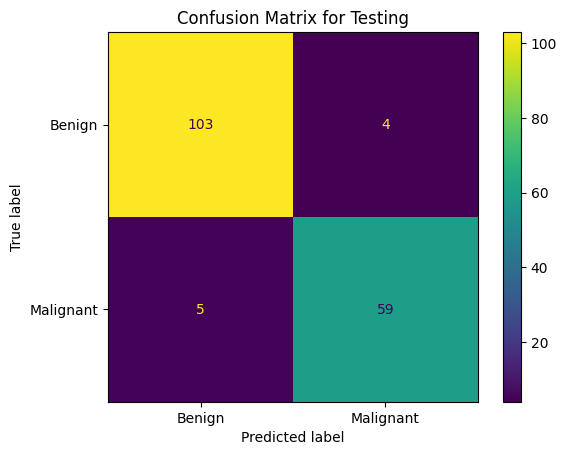

Testing F1 Score: 0.9291338582677166
Testing Precision Score: 0.9365079365079365
Testing Recall Score: 0.921875
[403.8001720973718, 422.1464110870792, 373.0802111243835, 122.91351770333034, 364.0523277147691, 157.73173420062156, 341.89167233093013, 190.60028355718362, 161.51116749727467, 152.90417264427975, 249.86604536477284, 270.9600508723538, 310.6237264586674, 209.58144533616243, 161.89571804849945, 205.454330217718, 237.35283976291623, 274.97397597577464, 484.8674116967701, 162.41803150011026, 146.10454977680328, 74.8598319259713, 215.75622572027655, 531.2279341085168, 429.32797570536576, 307.87368513272276, 197.38809265635166, 317.3345010360532, 262.0705265892649, 277.52140944110914]
[118.87261573333333, 124.6974489, 112.91308503333333, 41.33339493333334, 111.22280716666667, 50.1848434, 102.26457876666666, 60.4812649, 52.16324133333333, 49.78114663333333, 77.0848317, 82.1064985, 98.9490263, 66.7292417, 52.9290484, 65.3176521, 72.58193943333333, 83.67936593333333, 139.911383033333

In [41]:
# Extract the regressors and the target from the data frame
# x, y = features.iloc[:,:].to_numpy(), targets.iloc[:,0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=0, stratify=targets)
print(X_train.shape)
print(X_test.shape)

model = LogisticRegression(solver='newton-cg', random_state=0,penalty=None).fit(X_train, y_train)
ypred_train = model.predict(X_train)
print(f"Training accuracy = {model.score(X_train, y_train)}")
cfm = confusion_matrix(y_train, ypred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Training')
plt.show()
training_f1_score = f1_score(y_train, ypred_train, pos_label='M')
training_precision_score = precision_score(y_train, ypred_train, pos_label='M')
training_recall_score = recall_score(y_train, ypred_train, pos_label='M')
print(f"Training F1 Score: {training_f1_score}")
print(f"Training Precision Score: {training_precision_score}")
print(f"Training Recall Score: {training_recall_score}")

ypred = model.predict(X_test)
print(f"Testing accuracy = {model.score(X_test, y_test)}")
print(f"Coefficients: ", model.intercept_, model.coef_)
cfm = confusion_matrix(y_test, ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Testing')
plt.show()
testing_f1_score = f1_score(y_test, ypred, pos_label='M')
testing_precision_score = precision_score(y_test, ypred, pos_label='M')
testing_recall_score = recall_score(y_test, ypred, pos_label='M')
print(f"Testing F1 Score: {testing_f1_score}")
print(f"Testing Precision Score: {testing_precision_score}")
print(f"Testing Recall Score: {testing_recall_score}")

x_transpose = features.transpose()
std_list = []
mean_list = []
for i in range(x_transpose.shape[0]):
    std_list.append(stdev(x_transpose[i]))
    mean_list.append(mean(x_transpose[i]))
print(std_list)
print(mean_list)

normalized_coefficients = []
for i in range(len(model.coef_)):
    print(model.coef_[i], mean_list[i], std_list[i])
    normalized_coefficients.append((model.coef_[i] - mean_list[i]) / std_list[i])
print(f"Normalized coefficients: {normalized_coefficients}")
order = abs(np.array(normalized_coefficients)).argsort()
selected_columns = features.columns[order[0]]
print(f"Last values are most important: {selected_columns}")

Plot the logistic curve (by plotting probability estimates or scores).

In [42]:
# plt.scatter(x,y,color='b')
# x2 = np.linspace(1,8,200).reshape(-1,1)
# y2 = model.predict_proba(x2)
# plt.plot(x2,y2[:,1],color='k')
# plt.grid()
# plt.show()

## Student Data Set

In [43]:
# x = np.array([4.2,2.2,3.5,2.5,5.1,1.3,3.0,1.8,2.4,1.5]).reshape(-1,1); 
# y = np.array([1,0,1,1,1,0,0,0,1,0]);

# model = LogisticRegression(solver='newton-cg', random_state=0,penalty=None).fit(x, y)
# print(f"accuracy = {model.score(x, y)}")
# print(f"Coefficients: ", model.intercept_, model.coef_)
# cfm = confusion_matrix(y, model.predict(x))
# cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Fail", "Pass"])
# cm_display.plot()
# plt.title('Confusion Matrix')
# plt.show()

In [44]:
# plt.scatter(x,y,color='b')
# x2 = np.linspace(0,6).reshape(-1,1)
# y2 = model.predict_proba(x2)
# plt.plot(x2,y2[:,1],color='k')
# plt.grid()
# plt.show()

Generate the ROC curve for the Student Data Set.

AUC:  1.0


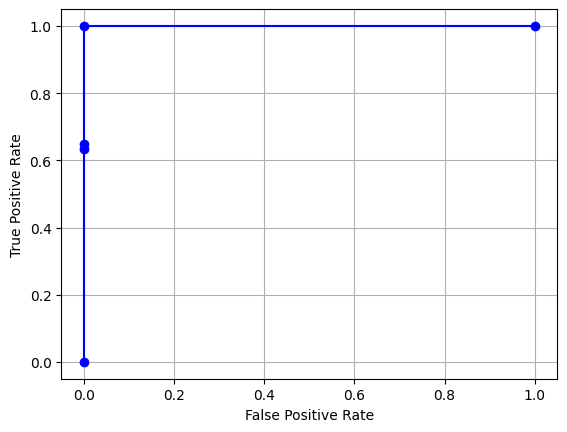

In [45]:
from sklearn import metrics

y2 = model.predict_proba(X_train)
# Use the binary labels for the training set
y_train_bin = (y_train == 'M').astype(int)
y_train_bin_values = y_train_bin['Diagnosis'].values

fpr, tpr, thresholds = metrics.roc_curve(y_train_bin_values, y2[:,1])
print(f"AUC: ", metrics.roc_auc_score(y_train_bin_values, y2[:,1]))
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

In [46]:
print(y_test)
print(y_train)

    Diagnosis
510         B
520         B
311         B
25          M
530         B
..        ...
32          M
377         B
535         M
236         M
354         B

[171 rows x 1 columns]
    Diagnosis
436         B
181         M
165         B
392         M
404         B
..        ...
145         B
564         M
301         B
314         B
396         B

[398 rows x 1 columns]


AUC:  0.9858352803738317


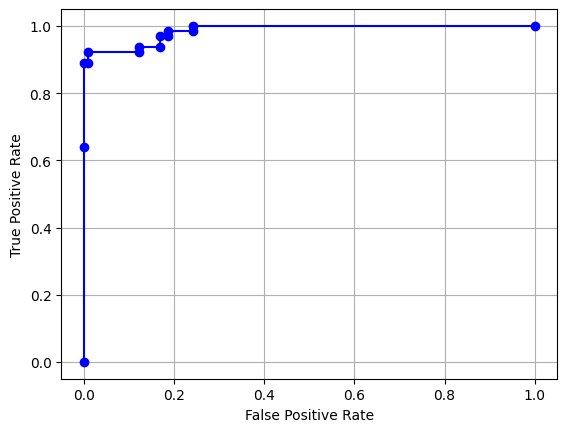

In [47]:
from sklearn import metrics

# Use the predicted probabilities for the positive class (Malignant, 'M')
y2 = model.predict_proba(X_test)

y_test_bin = (y_test == 'M').astype(int)
y_test_bin_values = y_test_bin['Diagnosis'].values

fpr, tpr, thresholds = metrics.roc_curve(y_test_bin_values, y2[:, 1])
print(f"AUC: ", metrics.roc_auc_score(y_test_bin_values, y2[:, 1]))
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()